In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15,
    'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 200,
})

import os, pickle
from pathlib import Path
import numpy as np
import torch
from jarvis.utils import tqdm

rng = np.random.default_rng()
FIG_PATH = Path('../figures')

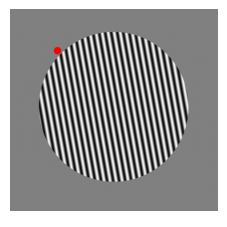

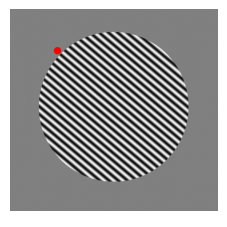

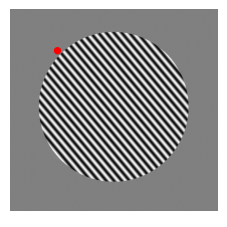

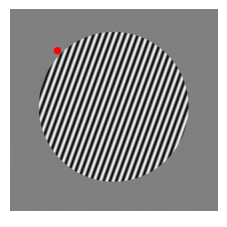

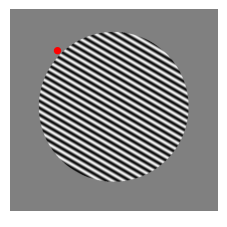

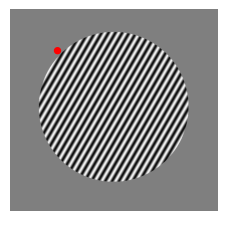

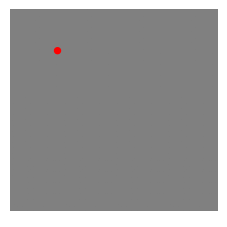

In [2]:
from matplotlib.patches import Circle

ys, xs = np.meshgrid(np.arange(1080), np.arange(1920), indexing='ij')
x_c, y_c = 960+189, 540+189
r = 252

for i in range(6):
    theta = rng.choice(18)/18*np.pi
    _xs = np.cos(theta)*xs+np.sin(theta)*ys
    _ys = -np.sin(theta)*xs+np.cos(theta)*xs
    k = 0.05
    canvas = 0.95*np.cos(2*np.pi*k*_xs+rng.choice(8)/8*2*np.pi)
    
    canvas[((xs-x_c)**2+(ys-y_c)**2)>r**2] = 0
    
    fig, ax = plt.subplots()
    ax.imshow(canvas, vmin=-1, vmax=1, cmap='gray')
    ax.add_artist(Circle((960, 540), 10, color='red'))
    ax.axis('off')
    ax.set_xlim([800, 1500])
    ax.set_ylim([1100, 400])
    fig.savefig(FIG_PATH/f'grating.example_{i}.svg')

canvas = np.zeros(xs.shape)
fig, ax = plt.subplots()
ax.imshow(canvas, vmin=-1, vmax=1, cmap='gray')
ax.add_artist(Circle((960, 540), 10, color='red'))
ax.axis('off')
ax.set_xlim([800, 1500])
ax.set_ylim([1100, 400])
fig.savefig(FIG_PATH/'fixation.only.svg')